In [1]:
import tensorflow as tf
import pandas as pd
from utils.transforms import RandomCrop,Resize,Normalize
from PIL import Image
import numpy as np

In [2]:
resize = Resize(256)
crop = RandomCrop(240)
norm = Normalize(scale=100)

In [3]:
image = Image.open("data/test/Christopher_Amolsch_50.jpg").convert("RGB")
image = np.array(image)
kps = np.ones((136))
print(kps.shape,image.shape)
image,kps = resize([image,kps])
image_new,kps_new = crop([image,kps])
image,kps = norm([image_new,kps_new])
print(kps.shape,image.shape)

(136,) (306, 287, 3)
(136,) (240, 240, 3)


In [4]:
interpreter = tf.lite.Interpreter(model_path='face_240_240_uint8_50.tflite')
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()[0]
output_details = interpreter.get_output_details()[0]

print("input:",input_details["quantization"])
print("output:",output_details["quantization"])

if input_details['dtype'] == np.uint8:
    input_scale,input_zero_point = input_details["quantization"]
    test_image = image / input_scale + input_zero_point
    print("input")
test_image = np.expand_dims(test_image,axis=0).astype(input_details["dtype"])
interpreter.set_tensor(input_details["index"],test_image)
interpreter.invoke()
output = interpreter.get_tensor(output_details["index"])[0]
# output = np.array(output,dtype=np.uint8)
if output_details['dtype'] == np.uint8:
    output_scale,output_zero_point = output_details["quantization"]
    out = (output - output_zero_point)*output_scale

out = out * 100

input: (1.0, 0)
output: (0.008348270319402218, 0)
input


In [5]:
import matplotlib.pyplot as plt
def show_keypoints(image, key_pts):
    """
    Args:
        image: 图像信息
        key_pts: 关键点信息，
    展示图片和关键点信息
    """
    plt.imshow(np.array(image,dtype=np.uint8))  # 展示图片信息
    for i in range(len(key_pts)//2,):
        plt.scatter(key_pts[i*2], key_pts[i*2+1], s=20, marker='.', c='b') # 展示关键点信息

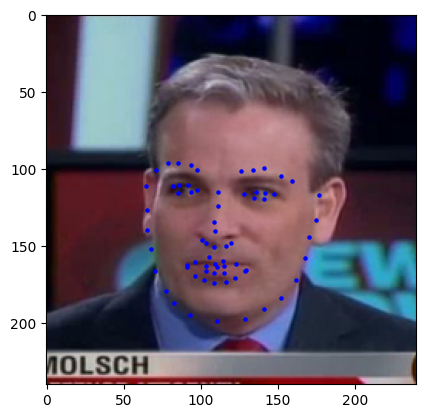

In [6]:
show_keypoints(image,out)

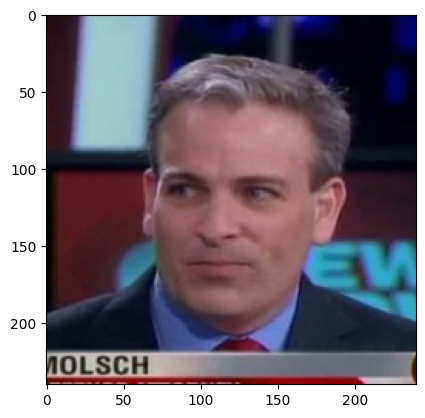

In [7]:
plt.imshow(image)